# Сборный проект: интернет-магазин Стримчик

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## 1. Откроем файл и изучим общую информацию

Импортируем требуемые библиотеки

In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from scipy import stats as st
from urllib.request import urlretrieve
from pathlib import Path

In [2]:
Path('datasets').mkdir(parents=True, exist_ok=True)

def import_df(file_name, url):
    if not os.path.exists(file_name):
        print(file_name, 'Файл не был найден, будет загружен из сети')
        _ = urlretrieve(url, file_name)
urls = {
    'games': ('games.csv', 'https://code.s3.yandex.net/datasets/games.csv')
}

[import_df(*urls[k]) for k in urls]

df = pd.read_csv(urls['games'][0])


Перевели названия столбцов в нижний регистр

In [3]:
df.columns = map(str.lower, df.columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
len(df['name'].unique())

11560

In [9]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [10]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
df['user_score'].unique()
# tbd -  to be determined

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.6       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Изучили общую информацию: 
- Всего 16715 строк
- 11560 уникальных наименований игр
- Нет полных дубликатов на данном этапе
- Пропуски в столбце year_of_release. Возможно, игры не вышли в релиз на момент состава датасета. Также неверный формат данных
- Множество пропусков в столбцах оценок от критиков и игроков: critic_score и user_score
- В столбце оценок от игроков user_score присутствуют значения tbd, что означают to be determined (будет определено). Скорее всего, игроки еще не дали своих оценок данным играм на тот момент

## 2. Подготовка данных

Создадим функцию для поиска строк с пропусками

In [16]:
def show_empty_data(col):
    return df[df[col].isnull()]

Пропуски в столбце 'name'

In [17]:
show_empty_data('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Об этих играх на платформе GEN мало что известно и их всего 2. Предлагаю убрать их из данных.

In [18]:
df = df[pd.notnull(df['name'])]

In [19]:
show_empty_data('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Как было выявлено в прошлом шаге, всего 16715 строк, но при этом 11560 уникальных наименований игр. Это означает что, одна и та же игра могла выпуститься на разных платформах. Следственно, пропущенные значения в датах релиза могут принадлежать одним и тем же играм. Также известно, что игровые студии стараются выпускать в релиз игры на все платформы одновременно, значит мы можем использовать даты релиза других платформ для заполнения пропусков.

In [21]:
filled_year = df[pd.notnull(df['year_of_release'])]

In [22]:
def fill_year(row, **col):
    rows = filled_year[filled_year['name'] == row['name']]

    if len(rows) > 0:
        return rows.iloc[0]['year_of_release']
    return row['year_of_release']

In [23]:
df['year_of_release'] = df.apply(fill_year, axis=1)

In [24]:
df['year_of_release'].isnull().sum()

146

Несмотря на применение функции, 146 игр так и остались с неизвестной датой релиза, но относительно всего датасета это небольшая часть.

In [25]:
show_empty_data('user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
show_empty_data('critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Слишком большое количество пропущенных данных в столбцах оценок критиков и игроков. Если заполнить их, то они сильно повлияют на распределения в дальнейшем. Предлагаю пока оставить на этом моменте
- В столбце user_score есть значения tbd (to be determined). Поменяем его на nan

In [27]:
tbd = df['user_score'] != 'tbd'
df['user_score'].where(tbd, np.nan, inplace=True)

### Приведем данные к нужным типам

In [28]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float64')


- Данные в столбце года релиза должны быть целочисленными
- Данные в столбце оценок от пользователей должны быть числами с плавающей точкой, так как оценки исчисляютсяпо 10 балльной шкале

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [30]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3. Исследовательский анализ данных

### Выпуск игр в разные годы

In [31]:
games_per_year = (df[['name', 'year_of_release']]
.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values('year_of_release', ascending=False))

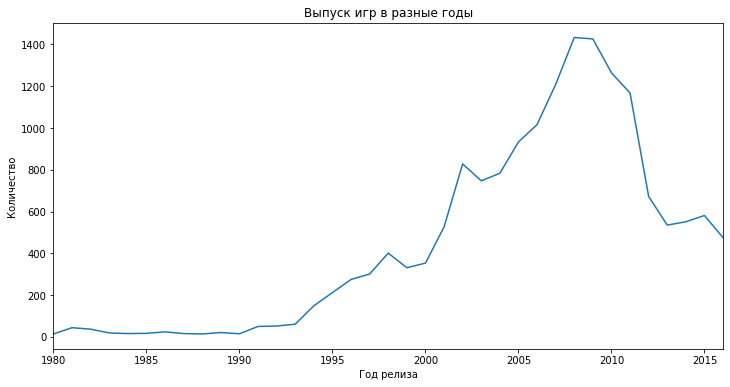

In [32]:
games_per_year.plot(figsize=(12, 6), legend=False, title='Выпуск игр в разные годы').set(xlabel='Год релиза', ylabel='Количество')
plt.show()

Как показано на графике, увеличение выпуска игр пришло после 90-х годов. Возможно, это связано с выпуском и общедоступностью игровых консолей. Например, популярная серия игровых консолей Playstation начала выпускаться с 1994 года.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Или изменился потртрет потребителя - люди охотнее стали больше вреени тратить на игры?

### Изменение продаж по платформам

In [33]:
sales_for_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

In [34]:
def make_bar_plot(data):
    data.plot(kind='bar', y='total_sales', legend=False, title='Количество продаж по платформам', figsize=(12, 6)).set(xlabel='Платформа',ylabel='Продажи')
    plt.show()

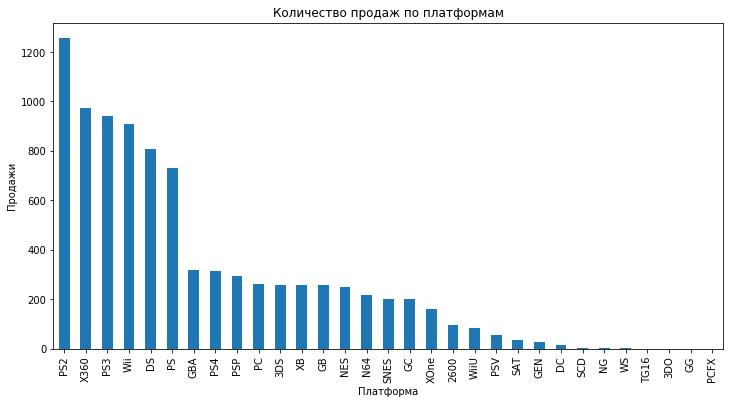

In [35]:
make_bar_plot(sales_for_platform)

Возьмем первые 5 платформ как самые популярные

In [36]:
top_5_platforms = sales_for_platform.head()
top_5_platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [37]:
def year_total_sale_for_platform(name, data):
    return (data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending=False))

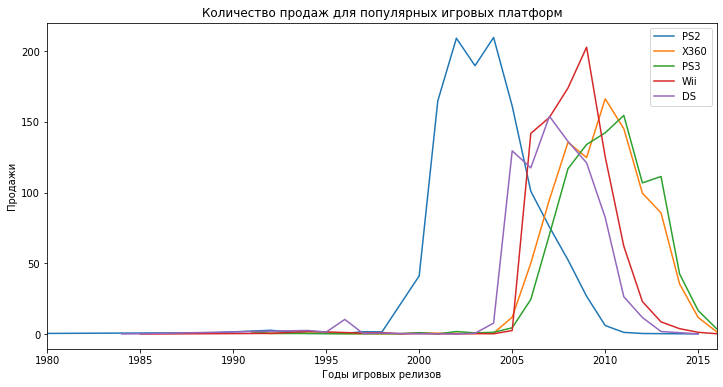

In [38]:
for i in list(top_5_platforms.index):
    year_total_sale_for_platform(i, df)['total_sales'].plot(figsize=(12, 6), label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Продажи')
    plt.legend()



- Как видно на графике, игровой платформе нужно примерно 10 лет чтобы пережить свои стадии жизненного цикла продукта(внедрение на рынок, рост, зрелость и спад). Таким образом актуальным периодом будет от 2006 года до 2016 года
- Самое большое количество игр было у Playstation 2(PS2). Она пережила два пика популярности с 2000 по 2005 года

In [39]:
relevant_years = (df['year_of_release'] > 2006) & (df['year_of_release'] <= 2016)
relevant_games = df.loc[relevant_years]

### Какие платформы лидируют по продажам, а какие падают

In [40]:
total_sales_for_relevant = relevant_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

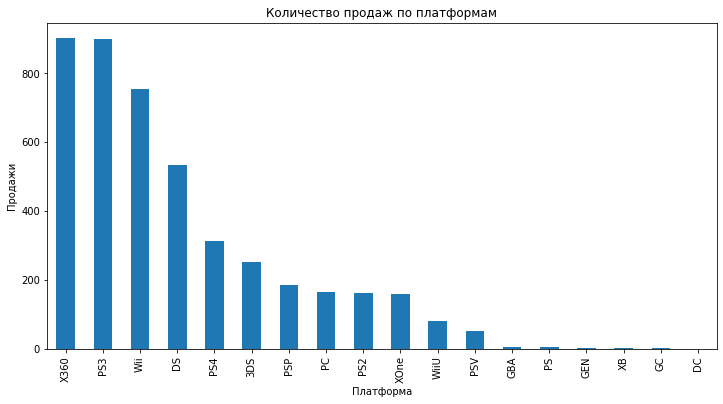

In [41]:
make_bar_plot(total_sales_for_relevant)

Продажи за актуальный период

### Рассмотрим каждую платформу подробнее

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2011.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


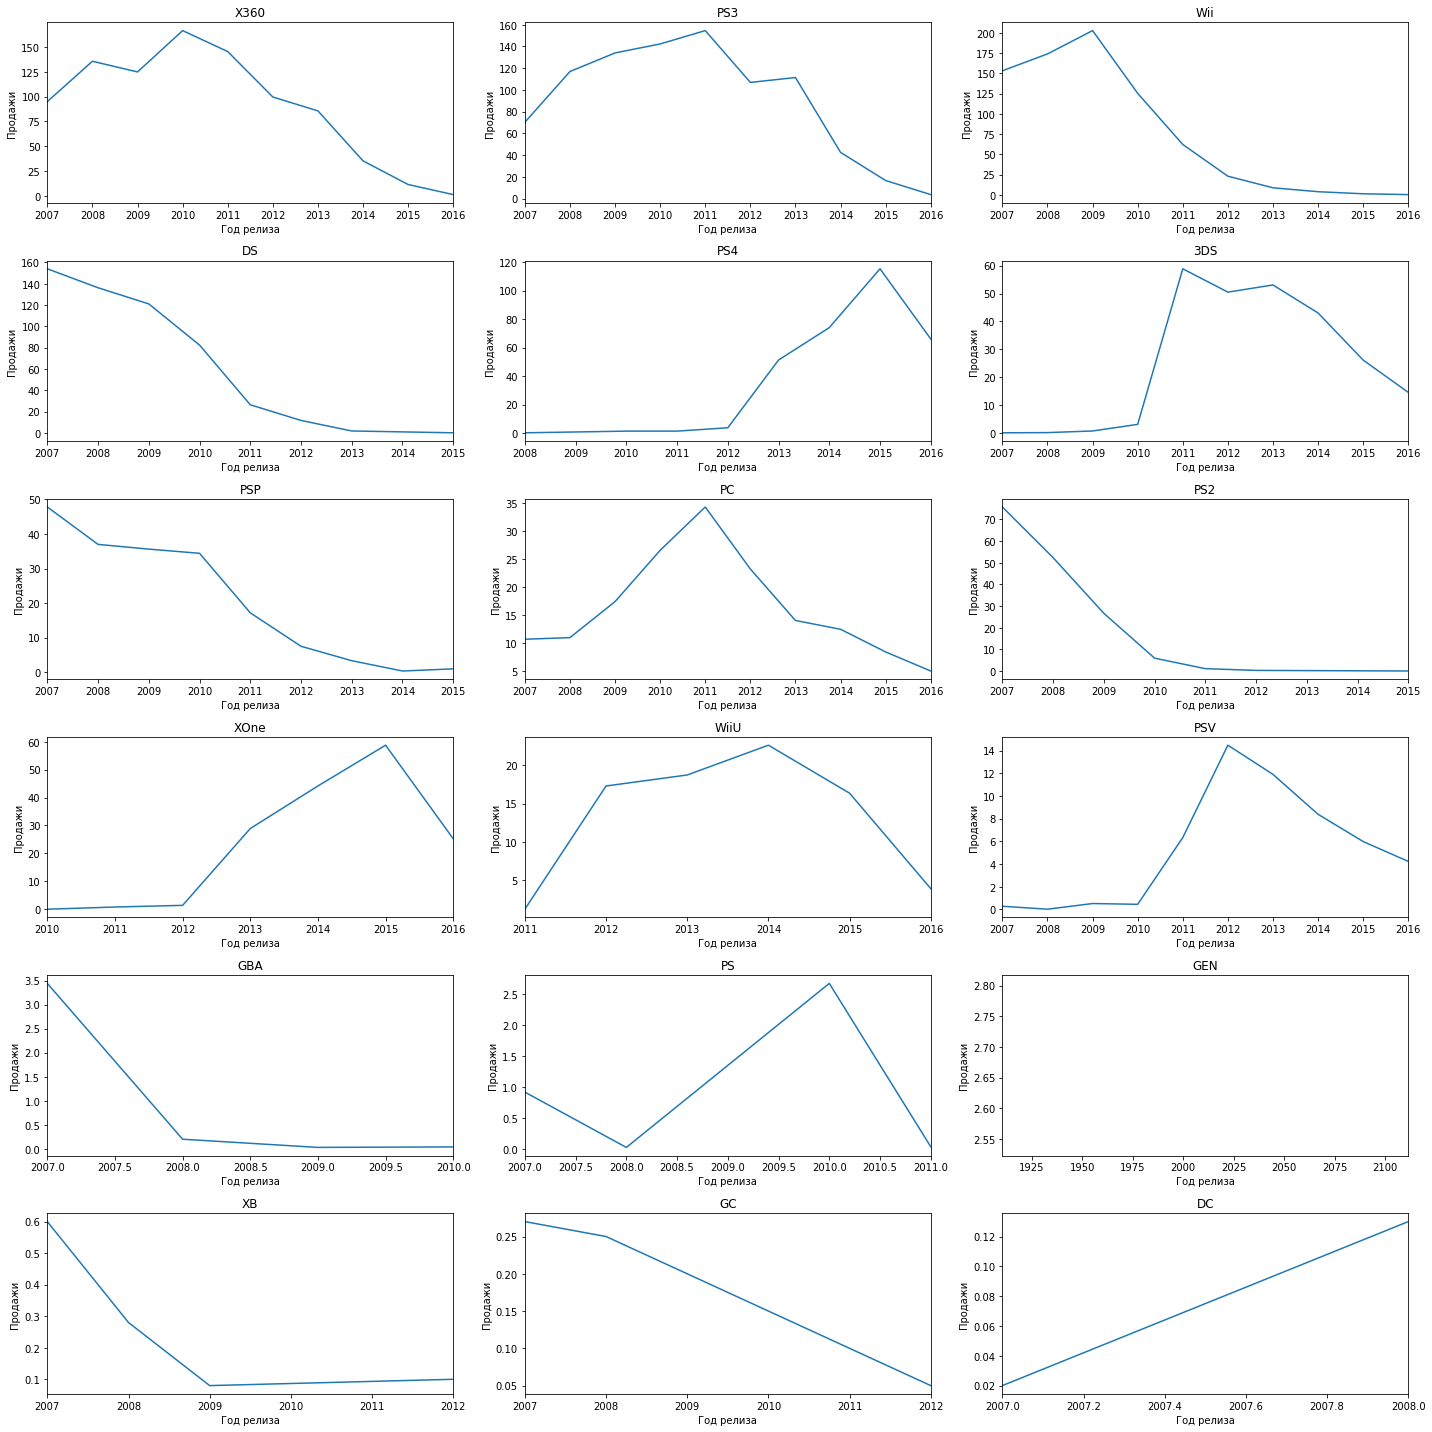

In [42]:
platforms = list(total_sales_for_relevant.index)
rows = 6
columns = (len(platforms) // rows)
fig, ax = plt.subplots(rows, columns)
a = 0

for row in range(rows):
    for column in range(columns):
        platform = platforms[a]
        (year_total_sale_for_platform(platform, relevant_games)['total_sales']
            .plot(ax=ax[row, column], figsize=(20, 20), title=platform)
            .set(xlabel='Год релиза', ylabel='Продажи'))
            
        a +=1
plt.tight_layout()
plt.show()


- Как видно на графике, популярные консоли (Xbox360, PS3) уже пришли к спаду в 2016 году
- Их коллеги нового поколения(XOne, PS4)также уже пережили свой пик расцвета
- Возьмем консоли от Sony и Microsoft как наиболее потенциально прибыльные платформы

### Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам

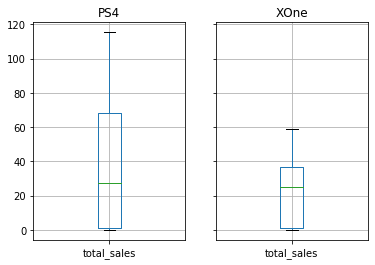

In [43]:
new_gen_platforms = ['PS4', 'XOne']
fig, axs = plt.subplots(1, 2, sharey=True)

for num, platform in enumerate(new_gen_platforms):
    data = year_total_sale_for_platform(platform, relevant_games)
    data.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.show()


У PS4 в два раза выше продажи по всему миру чем у XOne. 

### Влияние оценок критиков и пользователей на продажи внутри одной платформы

In [44]:
ps4 = relevant_games[relevant_games['platform'] == 'PS4']
columns = ['user_score', 'critic_score', 'total_sales']


In [45]:
ps4[columns].corr()


,user_score,critic_score,total_sales
user_score,1.000000,0.558747,-0.031846
critic_score,0.558747,1.000000,0.407443
total_sales,-0.031846,0.407443,1.000000


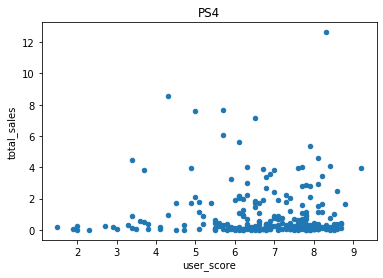

In [46]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')

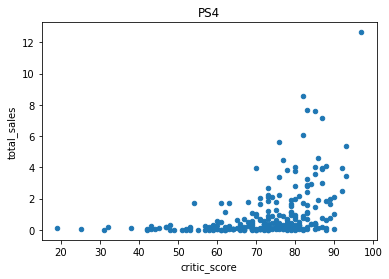

In [47]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')

- Нет взаимосвязи между оценками игроков и продажам
- Есть взаимосвязь между оценками критиков и игроков
- Также присутствует связь между оценками критиков и продажами
- Но как показано на графике, высокая оценка критиков не гарантирует высокие продажи

### Распределение игр по жанрам

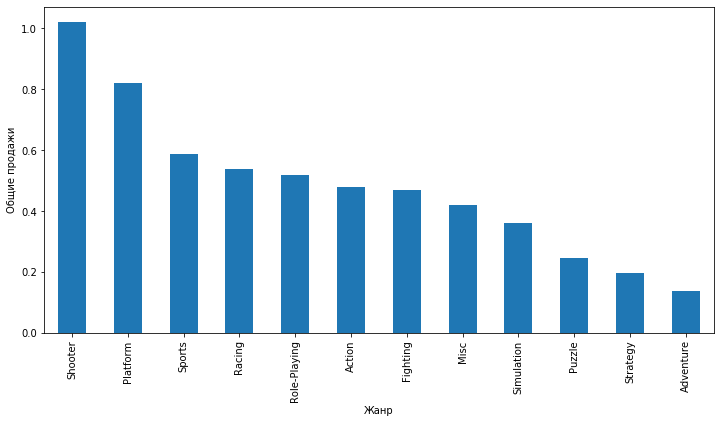

In [23]:
(relevant_games.pivot_table(index='genre', values='total_sales')
.sort_values('total_sales', ascending=False)
.plot(kind='bar', y='total_sales', figsize=(12, 6), legend=False)
.set(xlabel='Жанр', ylabel='Общие продажи'))

plt.show()

Самым прибыльным жанром по миру является шутер. И наоборот, жанр, риносящиц прибыль меньше всех является квест.

## 4. Составим портрет пользователя каждого региона

### Найдем топ 5 платформ в каждом регионе

In [46]:
def regional_top5(column, region):
    return relevant_games.pivot_table(index=column, values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()

In [47]:
def regional_pie_of_sales(df, name, region):
    (df.plot.pie(
        y=region, 
        legend=False, 
        pctdistance=1.1, 
        labeldistance=1.2, 
        autopct='%1.0f%%', 
        figsize=(12,6), title=name))
    plt.show()

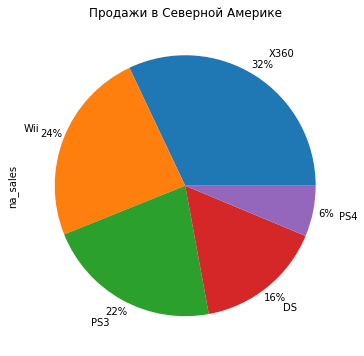

In [52]:
regional_pie_of_sales(regional_top5('platform', 'na_sales'), 'Продажи в Северной Америке', 'na_sales')

Самой популярной консолью в Северной Америке является Xbox. Microsoft удерживает позиции на родном рынке

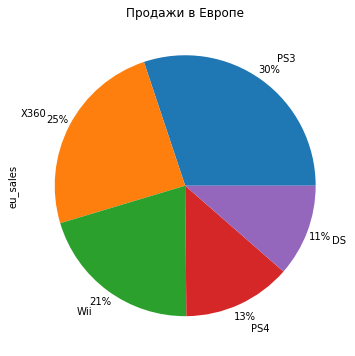

In [53]:
regional_pie_of_sales(regional_top5('platform', 'eu_sales'), 'Продажи в Европе', 'eu_sales')

А  вот В Европе уже более популярна консоль от Sony

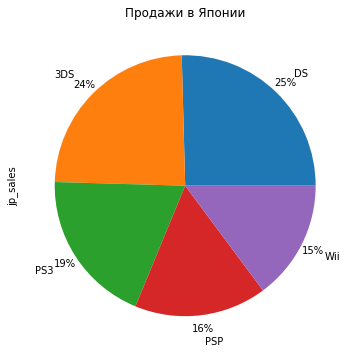

In [54]:
regional_pie_of_sales(regional_top5('platform', 'jp_sales'), 'Продажи в Японии', 'jp_sales')

В Японии местные жители отдают преподчтения консолям отечественных компаний. Microsoft даже не вошла в в пятерку популярных консолей. Nintendo удерживает лидирующие позиции по продажам. Две консоли этой фирме занимают первые два места по продажам в данном регионе. Кстати, что интересно, обе консоли портативные.

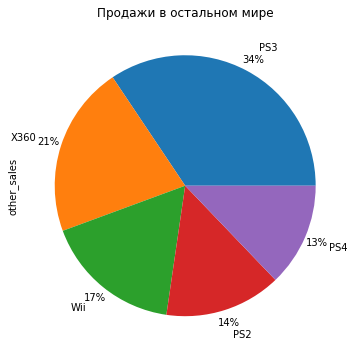

In [55]:
regional_pie_of_sales(regional_top5('platform', 'other_sales'), 'Продажи в остальном мире', 'other_sales')

В остальных странах мира лидирующую позицию занимает PS3, а затем уже Xbox

### Найдем топ 5 популярных жанров видеоигр в каждом регионе

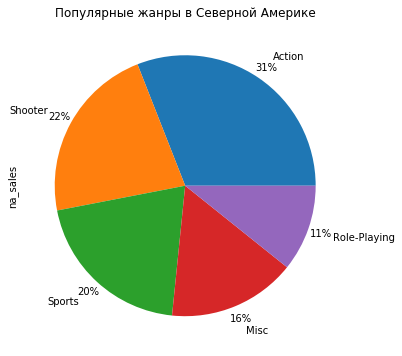

In [56]:
regional_pie_of_sales(regional_top5('genre', 'na_sales'), 'Популярные жанры в Северной Америке', 'na_sales')

Самым популярным жанром в Северной Америке является action

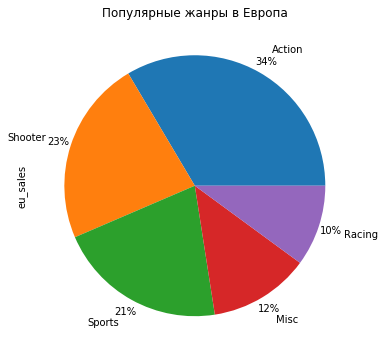

In [57]:
regional_pie_of_sales(regional_top5('genre', 'eu_sales'), 'Популярные жанры в Европа', 'eu_sales')

В Европе тоже самым популярным жанром остался action.

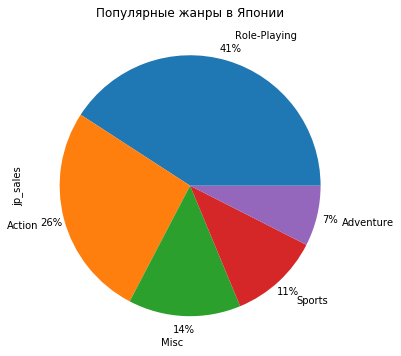

In [58]:
regional_pie_of_sales(regional_top5('genre', 'jp_sales'), 'Популярные жанры в Японии', 'jp_sales')

А вот в Японии уже самым продаваемым жанром стал Role-Playing. Action уже занимает второе место.

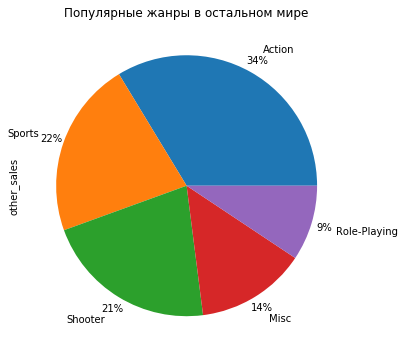

In [59]:
regional_pie_of_sales(regional_top5('genre', 'other_sales'), 'Популярные жанры в остальном мире', 'other_sales')

В остальном мире самым популярным Action и на втором месте по поулярности жанр Sports

### Найдем влияние рейтинга на продажи в разных регионах

- E - everyone
- EC  early childhood
- E10+ - older than 10 years old
- K-A - kids to adults
- T - teen
- M - mature +17 
- AO - adults only
- RP - rating pending

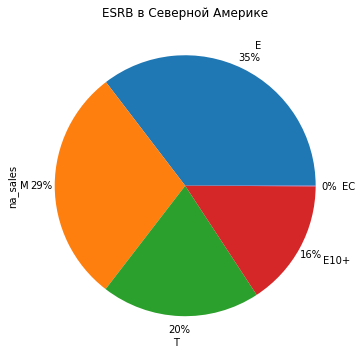

In [60]:
regional_pie_of_sales(regional_top5('rating', 'na_sales'), 'ESRB в Северной Америке', 'na_sales')

Большая доля игр приходится на игры с рейтингом E(для всех) и на игры с рейтингом M(для взрослых)

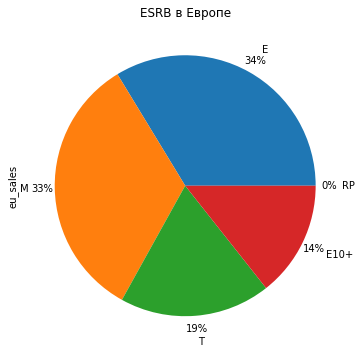

In [61]:
regional_pie_of_sales(regional_top5('rating', 'eu_sales'), 'ESRB в Европе', 'eu_sales')

Похожая ситуация и в Европе - популярны игры с рейтингами E и M

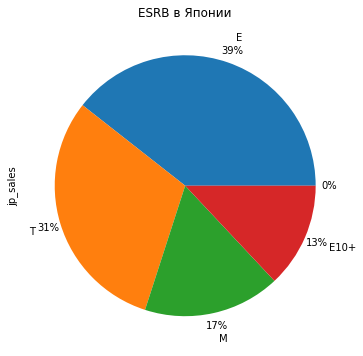

In [62]:
regional_pie_of_sales(regional_top5('rating', 'jp_sales'), 'ESRB в Японии', 'jp_sales')

В Японии же на втором месте по популярности игры с рейтингом T(для подростков) и первое E(для всех)

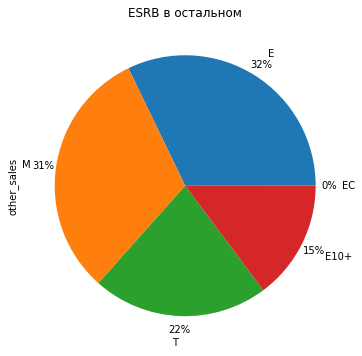

In [63]:
regional_pie_of_sales(regional_top5('rating', 'other_sales'), 'ESRB в остальном', 'other_sales')

В остальном мире подобная ситауция с рейтингами в Европе и Северной Америке

### Общий вывод
- Первенство в мире (кроме Японии) по продажам поочередно удерживают такие крупные компании как Sony и Microsoft
- Среднестатические игроки в Северной Америке и Европе похожи: отдают предпочтения играм жанров Action и Shooter, рейтингов Е и М
- Игроки в Японии в принципе отличаются от остального мира. Очень популярны консоли портативного типа и игры, жанра Role-Playing
- Игры рейтинга E(для всех) - самые популярные. Родители покупают для детей и вместе проводят время за приставкой\компьютером

## 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры для платформ PC и XBox

Нулевая гипотеза H₀:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [48]:
pc = relevant_games[relevant_games['platform'] == 'PC'] 
xone = relevant_games[relevant_games['platform'] == 'XOne']

alpha = .01
results = st.ttest_ind(pc['user_score'], xone['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  0.03940921419393995
Не получилось отвергнуть Нулевую гипотезу


In [49]:
pc['user_score'].mean()

6.770790378006873

In [50]:
pc['user_score'].median()

7.1

In [51]:
xone['user_score'].mean()

6.508839779005524

In [52]:
xone['user_score'].median()

6.8

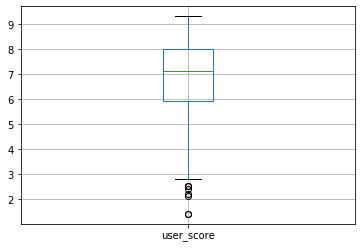

In [54]:
pc.boxplot('user_score')
plt.show()

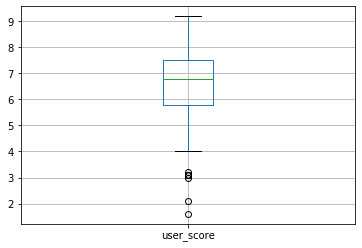

In [42]:
xone.boxplot('user_score')
plt.show()

Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 4% можно получить различность рейтингов двух платформ

### Средние пользовательские рейтинги жанров Action и Sports разные

В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры жанров Action и Sports

Нулевая гипотеза H₀:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁:

- Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [27]:
action = relevant_games[relevant_games['genre'] == 'Action'] 
sports = relevant_games[relevant_games['genre'] == 'Sports']

alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  2.648261415089771e-12
Отвергаем Нулевую гипотезу


In [ ]:
action['user_score'].mean()

In [ ]:
action['user_score'].median()

Получив p-value, мы отвергли Нулевую гипотезу. Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится

## 6. Общий вывод
- Жизненный цикл продукта для консоли приходится на 10 лет
- Самые популярные консоли в мире принадлежат компаниям Sony и Microsoft
- Среднестатические игроки Северной Америки и Европы похожи
- Рынок видео игр в Японии отличается от остального мира. Они предпочитают портативные консоли и игры жанра RPG
- Наиболее продаваемыми играми являются игры рейтингка E(для все семьи)